##BoomBikes - Multiple Linear regression Model

Importing necessary Libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#Code to upload the data
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [13]:
# Read the given CSV file, and view first five records

bikes_data = pd.read_csv("day.csv")
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
bikes_data.shape

(730, 16)

In [15]:
#Lets get the info on this data
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


With the info we can clearly see that all columns are non-null and all the columns are filled. But we can confirm with below instruction

In [16]:
#Checking for null values
bikes_data.isnull().sum().sum()

0

As per the data dictionary<br>
weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

season :
- season (1:spring, 2:summer, 3:fall, 4:winter)

In [19]:
#Unique values in column weathersit and season
bikes_data.weathersit.unique()

array([2, 1, 3])

In [18]:
#Unique values in column weathersit and season
bikes_data.season.unique()

array([1, 2, 3, 4])

In [20]:
#Converting season values to string values using info from Data Dictionary
bikes_data['season']=bikes_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [21]:
#Data after the season conversion
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
bikes_data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [23]:
#Converting weathersit column to string values
bikes_data['weathersit']=bikes_data['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [24]:
#Data after the season conversion
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
#Strings are too long in weathersit lets shorten them
bikes_data['weathersit']=bikes_data['weathersit'].map({'Clear, Few clouds, Partly cloudy, Partly cloudy':'Clear Clouds','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':'Mist','Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'Light Snow','Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog':'Heavy Rain'})

In [35]:
#Data after the season conversion
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
#Converting yr values to 0:2018 and  1:2019
bikes_data['yr']=bikes_data['yr'].map({0:2018, 1:2019})

In [60]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
#Lets convert mnth, weekday
bikes_data['weekday']=bikes_data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bikes_data['mnth']=bikes_data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [62]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Tue,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Wed,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Thu,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
#describing the data
bikes_data.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


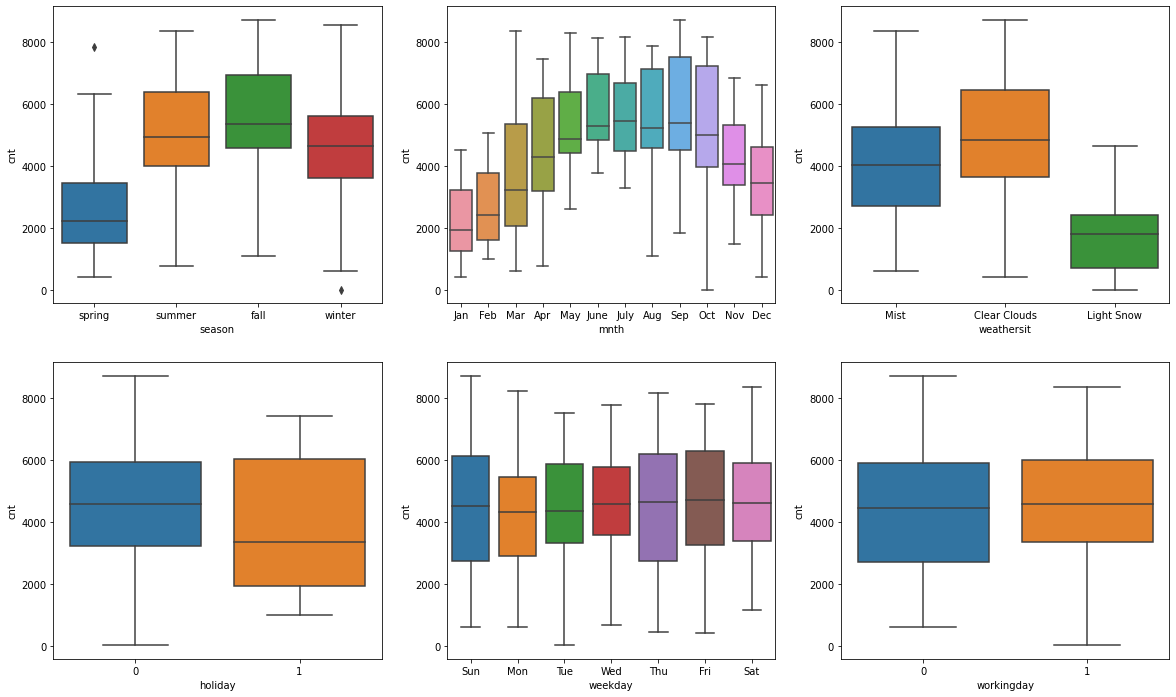

In [133]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_data)
plt.show()

In [72]:
#Dropping few redundant columns
#Drop instant as it is just an index column
#Drop dteday as we have yr and mnth
#Drop casual and registered as our target variable is cnt
#Create a new df from the exisitng by removing above said dropping variables
bikes_data_to_process=bikes_data[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

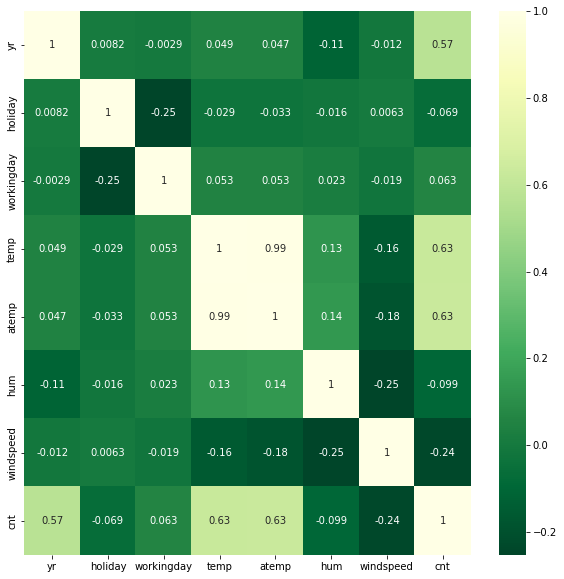

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(bikes_data_to_process.corr(), cmap="YlGn_r", annot = True)
plt.show()

Correlations Identified using above heatmap :
- "cnt" is correlated to "yr"
- "cnt" is correlated to "temp"
- "cnt" is correlated to "atemp"
- "temp" is correlated to "atemp"

We can drop one of "temp" and "atemp" columns as they both are highly correlated.
So lets drop "atemp" column, this will remove multicollinearity 

In [96]:
#Dropping atemp
bikes_data_to_process.drop('atemp',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
#Data after dropping atemp
bikes_data_to_process.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tue,1,Clear Clouds,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,Clear Clouds,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thu,1,Clear Clouds,9.305237,43.6957,12.522300,1600


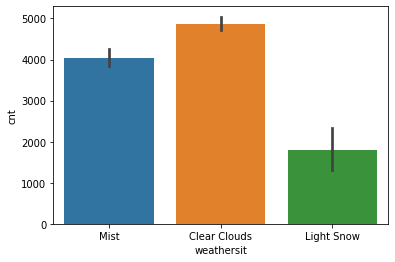

In [76]:
#Lets see how weathersit is impacting cnt
sns.barplot(x='weathersit',y='cnt',data=bikes_data_to_process)
plt.show()

The above bar chart shows that Count is higher during Clear Clouds weather

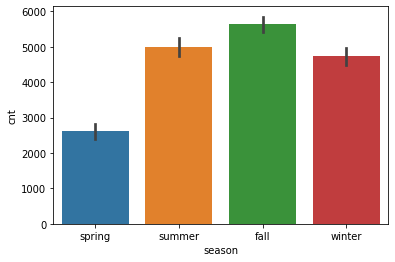

In [77]:
#Lets see how season is impacting cnt
sns.barplot(x='season',y='cnt',data=bikes_data_to_process)
plt.show()

The above chart shows that Count is higher during Fall season

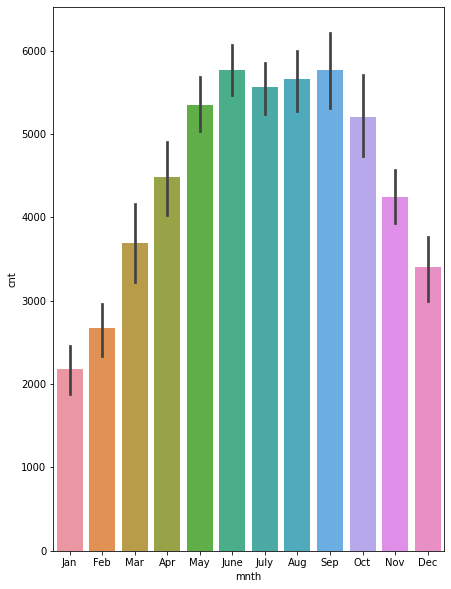

In [102]:
#Lets see how cnt spread accross the months
plt.figure(figsize=(7,10))
sns.barplot(x='mnth',y='cnt',data=bikes_data_to_process)
plt.show()

The chart shows that Count is higher in June month

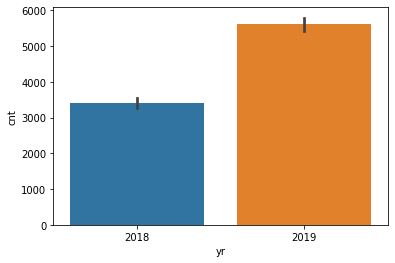

In [79]:
#Lets see how cnt spread accross the yr
sns.barplot(x='yr',y='cnt',data=bikes_data_to_process)
plt.show()

Count has significantly increased from 2018 to 2019

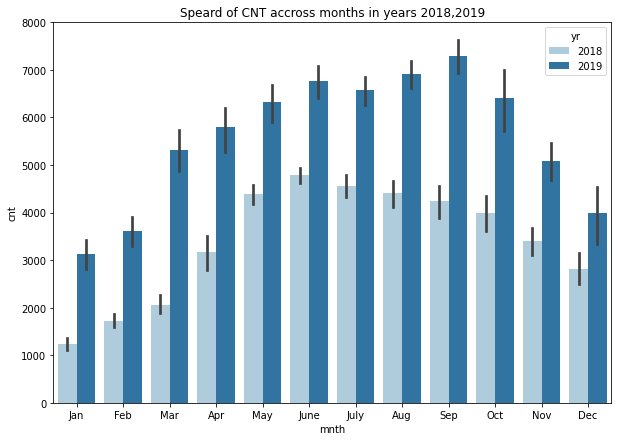

In [80]:
plt.figure(figsize=(10,7))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bikes_data_to_process,palette='Paired')
plt.title("Speard of CNT accross months in years 2018,2019")
plt.show()

Above chart shows that Count is higher in month of June in 2018, vs Count in sep month in 2019

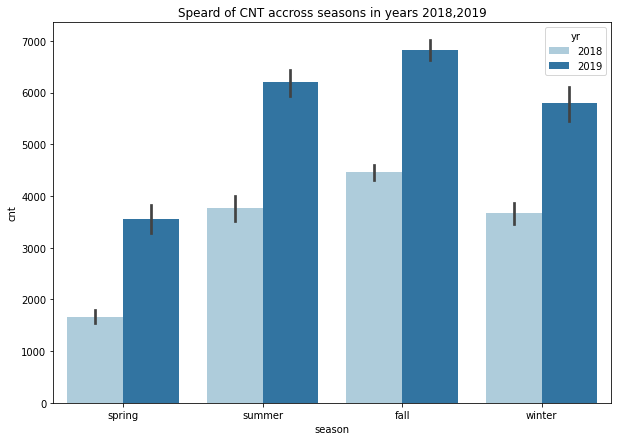

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(x='season',y='cnt',hue='yr',data=bikes_data_to_process,palette='Paired')
plt.title("Speard of CNT accross seasons in years 2018,2019")
plt.show()

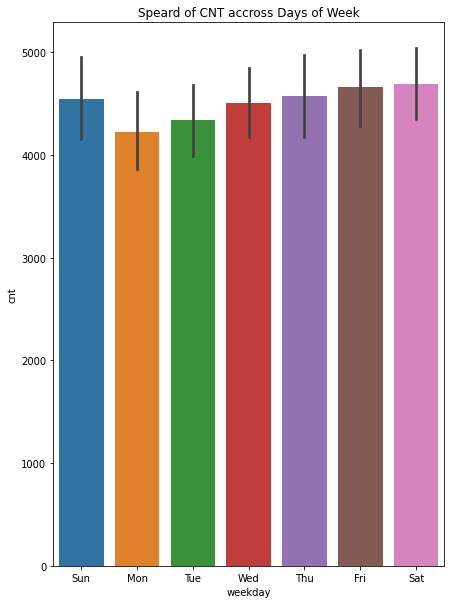

In [89]:
plt.figure(figsize=(7,10))
sns.barplot(x='weekday',y='cnt',data=bikes_data_to_process)
plt.title("Speard of CNT accross Days of Week")
plt.show()

Count is higher on Satuday followed by Sunday

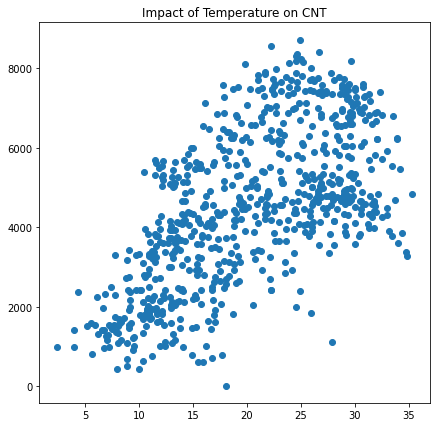

In [103]:
plt.figure(figsize=(7,7))
plt.scatter('temp','cnt',data=bikes_data_to_process)
plt.title("Impact of Temperature on CNT")
plt.show()

Above scatter chart tells us that with Count increases with increase in Temperature

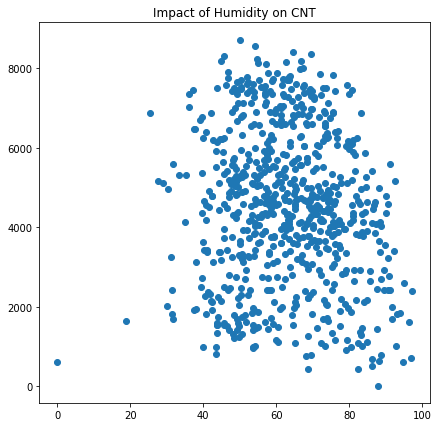

In [105]:
plt.figure(figsize=(7,7))
plt.scatter('hum','cnt',data=bikes_data_to_process)
plt.title("Impact of Humidity on CNT")
plt.show()

Above chart shows that counts are mostly concentrated while the humidity is high

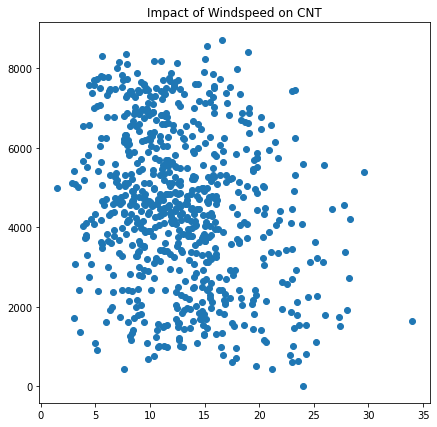

In [106]:
plt.figure(figsize=(7,7))
plt.scatter('windspeed','cnt',data=bikes_data_to_process)
plt.title("Impact of Windspeed on CNT")
plt.show()

Above chat shows that lower the windspeed higher the count

Before handling categorical variables.
Considering workingday and holiday variables.
As per the Data dictionary
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

So lets drop holiday column as it is already covered in workingday

In [107]:
#Dropping holiday column
bikes_data_to_process.drop('holiday',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
bikes_data_to_process.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Tue,1,Clear Clouds,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Wed,1,Clear Clouds,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Thu,1,Clear Clouds,9.305237,43.6957,12.522300,1600


In [109]:
#Lets convert the workingday values to Strings
bikes_data_to_process.workingday=bikes_data_to_process.workingday.map({0:'holiday',1:'working'})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
bikes_data_to_process.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Sun,holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Mon,holiday,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Tue,working,Clear Clouds,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Wed,working,Clear Clouds,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Thu,working,Clear Clouds,9.305237,43.6957,12.522300,1600


#Handling Categorical Variables
Create dummies for weathersit,weekday,yr,mnth,season,workingday

In [113]:
seasons = pd.get_dummies(bikes_data_to_process.season,drop_first=True)
workday = pd.get_dummies(bikes_data_to_process.workingday,drop_first=True)
weather= pd.get_dummies(bikes_data_to_process.weathersit,drop_first=True)
month= pd.get_dummies(bikes_data_to_process.mnth,drop_first=True)
weekday= pd.get_dummies(bikes_data_to_process.weekday,drop_first=True)
year= pd.get_dummies(bikes_data_to_process.yr,drop_first=True)

In [114]:
#Add all the dummies to bikes_data_to_process
bikes_data_to_process=pd.concat([bikes_data_to_process,seasons,workday,weather,month,weekday,year], axis=1)

In [125]:
bikes_data_to_process.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
0,spring,2018,Jan,Sun,holiday,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,2018,Jan,Mon,holiday,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,spring,2018,Jan,Tue,working,Clear Clouds,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,Wed,working,Clear Clouds,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,2018,Jan,Thu,working,Clear Clouds,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Point to be noted here is that We see that "Light Snow" and "Mist" are concatenated as we only have 3 unique values in the complete data.
Though the Data Dictionary has 4 values

In [126]:
# Now drop the categorical columns for which we have dummies
bikes_data_to_process.drop(['season','workingday','weathersit','weekday','mnth','yr'],axis=1,inplace=True)

In [127]:
bikes_data_to_process.head()

,temp,hum,windspeed,cnt,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now we have all the columns as numeric which can be inputs to our Model building

In [128]:
bikes_data_to_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   hum         730 non-null    float64
 2   windspeed   730 non-null    float64
 3   cnt         730 non-null    int64  
 4   spring      730 non-null    uint8  
 5   summer      730 non-null    uint8  
 6   winter      730 non-null    uint8  
 7   working     730 non-null    uint8  
 8   Light Snow  730 non-null    uint8  
 9   Mist        730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  July        730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

In [130]:
bikes_data_to_process.shape

(730, 28)

##Model- 1 - in a progressive way by adding variables

In [134]:
df_train, df_test = train_test_split(bikes_data_to_process, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


In [ ]:
scaler = MinMaxScaler()
#create a list of variables
num_vars=['temp','hum','windspeed','cnt']
#fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [137]:
df_train.head()

,temp,hum,windspeed,cnt,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [138]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


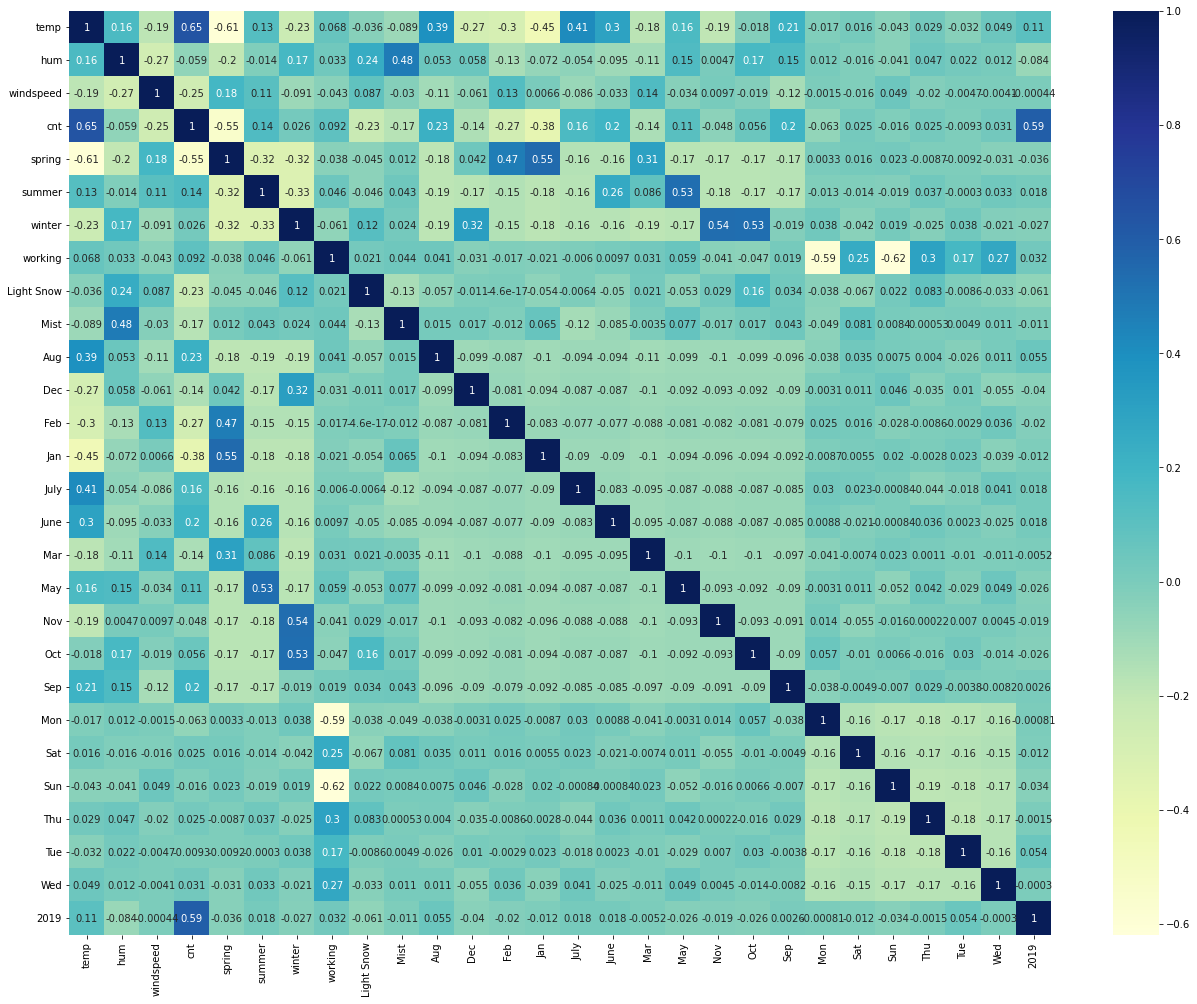

In [143]:
plt.figure(figsize=(22,17))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [144]:
#X_train, y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [145]:
X_train.head()

,temp,hum,windspeed,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
426,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [146]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

Add one variable at a time and check.
- Statistical Signigicance
- VIF

In [148]:
# ass a constant
X_train_sm = sm.add_constant(X_train['temp'])

# create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params
lr_model.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    0.169031
temp     0.640944
dtype: float64

In [150]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.46e-61
Time:                        12:17:51   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As P value is very low
- The result is statistically significant
- Checking the R-squared value is 0.416 which means that 41% in variance in cnt is explained by "temp" (Temperature) variable


In [152]:
# add another variable 
X_train_sm = X_train[['temp','hum']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           5.99e-65
Time:                        12:27:40   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
hum           -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the Correlation Heatmap.
Lets add following columns to build the model
-temp
-2019
-spring
-Jan
-Jul
-Oct
-Sep
-Nov
-May
-Sun
-Mon
-working
-summer
-winter
-Mist

In [162]:
# add another variable 
X_train_sm = X_train[['temp',2019,'spring','Jan','July','Oct','Nov','May','Sun','Mon','working','summer','winter','Mist']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.90e-150
Time:                        12:46:18   Log-Likelihood:                 419.91
No. Observations:                 510   AIC:                            -809.8
Df Residuals:                     495   BIC:                            -746.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0898      0.046      1.950      0.052      -0.001       0.180
temp           0.4988      0.042     11.803      0.000       0.416       0.582
2019           0.2388      0.010     24.680      0.000       0.220       0.258
spring        -0.0967      0.025     -3.940      0.000      -0.145      -0.048
Jan           -0.0184      0.021     -0.882      0.378      -0.060       0.023
July          -0.0748      0.021     -3.577      0.000      -0.116      -0.034
Oct           -0.0255      0.024     -1.049      0.295      -0.073       0.022
Nov           -0.0398      0.024     -1.662      0.097      -0.087       0.007
May            0.0234      0.021      1.124      0.262      -0.018       0.064
Sun            0.0872      0.033      2.669      0.008       0.023       0.151
Mon            0.0396      0.033      1.207      0.228      -0.025       0.104
working        0.0792      0.031      2.563      0.011       0.018       0.140
summer         0.0030      0.019      0.161      0.872      -0.034       0.040
winter         0.0717      0.025      2.811      0.005       0.022       0.122
Mist          -0.0645      0.010     -6.316      0.000      -0.085      -0.044
==============================================================================
Omnibus:                      155.117   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.166
Skew:                          -1.283   Prob(JB):                    5.54e-153
Kurtosis:                       8.139   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above model gives us good R-Squared 77%, but we can still see variables with high P value.

Lets remove them one by one

1. Oct
2. summer
3. Mon
4. Jan
5. May
6. Will see if we need to remove Nov as well

In [163]:
# removing variables with high P value
X_train_sm = X_train[['temp',2019,'spring','Sun','Sep','July','working','winter','Mist']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.83e-156
Time:                        12:46:33   Log-Likelihood:                 420.26
No. Observations:                 510   AIC:                            -820.5
Df Residuals:                     500   BIC:                            -778.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1311      0.027      4.867      0.000       0.078       0.184
temp           0.4839      0.035     13.783      0.000       0.415       0.553
2019           0.2391      0.010     24.974      0.000       0.220       0.258
spring        -0.1082      0.018     -6.150      0.000      -0.143      -0.074
Sun            0.0544      0.017      3.253      0.001       0.022       0.087
Sep            0.0526      0.018      2.888      0.004       0.017       0.088
July          -0.0698      0.020     -3.455      0.001      -0.109      -0.030
working        0.0467      0.013      3.596      0.000       0.021       0.072
winter         0.0428      0.014      3.008      0.003       0.015       0.071
Mist          -0.0646      0.010     -6.389      0.000      -0.084      -0.045
==============================================================================
Omnibus:                      160.252   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.105
Skew:                          -1.333   Prob(JB):                    7.05e-157
Kurtosis:                       8.170   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We did acheive decent R-Squared value 77% where we can stop

##Model- 2 - Bottom-Up Approach

In [164]:
# Adding all the columns to the Model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.00e-181
Time:                        12:55:27   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.052      4.675      0.000       0.141       0.347
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
working        0.0861      0.027      3.234      0.001       0.034       0.138
Light Snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Aug            0.0204      0.034      0.607      0.544      -0.046       0.086
Dec           -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb           -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan           -0.0633      0.034     -1.885      0.060      -0.129       0.003
July          -0.0338      0.035     -0.969      0.333      -0.102       0.035
June           0.0046      0.025      0.186      0.853      -0.044       0.053
Mar            0.0013      0.025      0.052      0.959      -0.047       0.050
May            0.0247      0.021      1.173      0.241      -0.017       0.066
Nov           -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct            0.0075      0.036      0.210      0.834      -0.063       0.078
Sep            0.0859      0.032      2.692      0.007       0.023       0.149
Mon            0.0404      0.030      1.346      0.179      -0.019       0.099
Sat            0.0091      0.016      0.588      0.557      -0.021       0.040
Sun            0.0946      0.030      3.163      0.002       0.036       0.153
Thu            0.0036      0.015      0.248      0.804      -0.025       0.032
Tue           -0.0118      0.015     -0.780      0.436      -0.042       0.018
Wed           -0.0088      0.015     -0.571      0.568      -0.039       0.022
2019           0.2324      0.008     28.819      0.000       0.217       0.248
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets look VIF also before dropping the column along with p-value as it tells us Multicollinearity of the variables

In [166]:
# VIF Values computation
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,hum,39.67
0,temp,38.19
6,working,22.49
3,spring,12.39
5,winter,12.10
4,summer,7.93
22,Sun,6.46
18,Oct,6.37
9,Aug,6.24
17,Nov,6.07


Mar -  has high p-Value, low VIF <br>
hum -  has high VIF value, low p-Value
<br>

Lets remove Mar and see the Model

In [167]:
X=X_train.drop('Mar',axis=1)

In [168]:
# Remove Mar and create the model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.87e-182
Time:                        13:15:17   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2448      0.050      4.925      0.000       0.147       0.343
temp           0.4450      0.046      9.763      0.000       0.355       0.535
hum           -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.245      0.000      -0.237      -0.136
spring        -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer         0.0427      0.026      1.668      0.096      -0.008       0.093
winter         0.1079      0.027      3.934      0.000       0.054       0.162
working        0.0862      0.027      3.239      0.001       0.034       0.138
Light Snow    -0.2558      0.026     -9.709      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.716      0.000      -0.080      -0.039
Aug            0.0198      0.032      0.627      0.531      -0.042       0.082
Dec           -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb           -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July          -0.0344      0.033     -1.035      0.301      -0.100       0.031
June           0.0042      0.023      0.179      0.858      -0.042       0.050
May            0.0243      0.020      1.235      0.218      -0.014       0.063
Nov           -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct            0.0066      0.031      0.215      0.830      -0.054       0.067
Sep            0.0852      0.029      2.945      0.003       0.028       0.142
Mon            0.0404      0.030      1.347      0.179      -0.019       0.099
Sat            0.0091      0.016      0.587      0.558      -0.021       0.040
Sun            0.0946      0.030      3.166      0.002       0.036       0.153
Thu            0.0036      0.015      0.246      0.806      -0.025       0.032
Tue           -0.0118      0.015     -0.783      0.434      -0.042       0.018
Wed           -0.0088      0.015     -0.574      0.566      -0.039       0.021
2019           0.2324      0.008     28.848      0.000       0.217       0.248
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# VIF Values computation for the above model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,hum,38.40
0,temp,38.13
6,working,21.41
5,winter,11.29
3,spring,9.53
4,summer,7.91
21,Sun,6.21
19,Mon,5.86
9,Aug,5.81
2,windspeed,5.25


In [172]:
#Now lets remove June
X=X_train.drop(['Mar','June'],axis=1)

In [173]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.72e-183
Time:                        13:21:11   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.050      4.942      0.000       0.148       0.343
temp           0.4493      0.039     11.630      0.000       0.373       0.525
hum           -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed     -0.1865      0.026     -7.302      0.000      -0.237      -0.136
spring        -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer         0.0416      0.025      1.678      0.094      -0.007       0.090
winter         0.1070      0.027      3.972      0.000       0.054       0.160
working        0.0864      0.027      3.255      0.001       0.034       0.139
Light Snow    -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Mist          -0.0595      0.010     -5.720      0.000      -0.080      -0.039
Aug            0.0163      0.025      0.656      0.512      -0.033       0.065
Dec           -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb           -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan           -0.0640      0.022     -2.902      0.004      -0.107      -0.021
July          -0.0381      0.026     -1.481      0.139      -0.089       0.012
May            0.0226      0.017      1.305      0.192      -0.011       0.057
Nov           -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct            0.0052      0.030      0.176      0.860      -0.053       0.064
Sep            0.0825      0.024      3.381      0.001       0.035       0.130
Mon            0.0408      0.030      1.364      0.173      -0.018       0.099
Sat            0.0091      0.015      0.589      0.556      -0.021       0.040
Sun            0.0950      0.030      3.189      0.002       0.036       0.154
Thu            0.0037      0.015      0.253      0.801      -0.025       0.032
Tue           -0.0117      0.015     -0.778      0.437      -0.041       0.018
Wed           -0.0088      0.015     -0.574      0.566      -0.039       0.021
2019           0.2323      0.008     28.999      0.000       0.217       0.248
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
#Now lets remove Oct, Thu, Wed, Aug
X=X_train.drop(['Mar','June','Oct','Thu','Wed','Aug','Tue','Mon','Sat','May','Feb'],axis=1)

In [185]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.20e-190
Time:                        13:25:21   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
working        0.0521      0.011      4.826      0.000       0.031       0.073
Light Snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Mist          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Dec           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Sep            0.0714      0.017      4.289      0.000       0.039       0.104
Sun            0.0625      0.014      4.493      0.000       0.035       0.090
2019           0.2311      0.008     28.929      0.000       0.215       0.247
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
# VIF Values computation for the above model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,hum,31.08
0,temp,18.94
2,windspeed,4.77
6,working,4.77
3,spring,4.50
5,winter,4.11
4,summer,2.88
8,Mist,2.32
15,2019,2.09
14,Sun,1.86


In [187]:
#Lets Remove hum as well

X=X_train.drop(['Mar','June','Oct','Thu','Wed','Aug','Tue','Mon','Sat','May','Feb','hum'],axis=1)

In [188]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model=lr.fit()

# Params/Summary
lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.84e-188
Time:                        13:26:48   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
working        0.0547      0.011      5.009      0.000       0.033       0.076
Light Snow    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist          -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July          -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
Sun            0.0670      0.014      4.758      0.000       0.039       0.095
2019           0.2348      0.008     29.173      0.000       0.219       0.251
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# VIF Values computation for the above model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,temp,6.92
5,working,4.74
1,windspeed,4.71
2,spring,3.09
4,winter,3.03
3,summer,2.33
14,2019,2.08
13,Sun,1.86
11,Nov,1.79
9,Jan,1.67


So I think with the above model we have acheived 84% R-Squared with VIF less than 7. But I do not think we should remove the temp as it is highly significant variable.

##Residual Analysis

In [190]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.753784
426    0.498740
728    0.315280
482    0.595855
111    0.296112
         ...   
578    0.834078
53     0.252189
350    0.265838
79     0.323028
520    0.645137
Length: 510, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


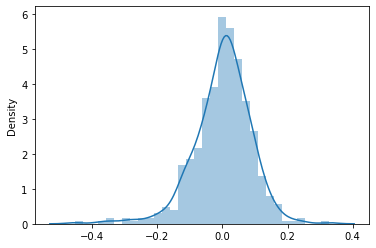

In [192]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

So the residuals are normally distributed.

##Predictions and Evalution on the Test Set

In [193]:
# Here we just need to transfor the Test Set
#create a list of variables
num_vars=['temp','hum','windspeed','cnt']
#fit on data
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
299,0.511964,0.837699,0.334206,0.303382,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
df_test.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.700000,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.481818
std,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.459303,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.500809
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
y_test = df_test.pop('cnt')
X_test = df_test

In [196]:
#Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,temp,hum,windspeed,spring,summer,winter,working,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
535,1.0,0.901354,0.610133,0.153728,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
299,1.0,0.511964,0.837699,0.334206,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
221,1.0,0.881625,0.437098,0.339570,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
152,1.0,0.817246,0.314298,0.537414,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
#Drop the variables which are not there in Model
X_test_sm = X_test_sm.drop(['Mar','June','Oct','Thu','Wed','Aug','Tue','Mon','Sat','May','Feb','hum'],axis=1)

In [198]:
#Predict the y test
y_test_pred = lr_model.predict(X_test_sm)

In [200]:
#Evaluate Model
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8168681962672555

##Finally we have come to a conclusion that
- Model gave 84% while traning
- And 81% while on the Test set

This Completes the Model Building